# Question 1 

In [ ]:
# Import some necessary libraries 
import numpy as np
import matplotlib.pyplot as plt
import copy
from matplotlib import cm

## Part a)

In [ ]:
N=21 
d=2
epsilon=1
h=1

#initial condition
potential_initial=np.zeros((N,N)) 
sigma= 81/76 # the d phi/d x values 

In [ ]:
# The triangular charge distribution 

charge_density=np.zeros((N,N)) 
left_spare = 2 
starting_row = 14
base_length = 16 

for i in range(14,6,-1):
    starting_point = (14-i)+2
    number_of_points = 16 - ((14-i)*2) 
    #print(f"When i ={i},{starting_point},{number_of_points}")
    for j in range(starting_point,(starting_point+number_of_points)):
        charge_density[i,j] = 1

#print(charge_density)

In [ ]:
def jacobi_relaxation_vN(bound_jr):
    
    iterations=0
    potential_here=copy.deepcopy(potential_initial)
    
    while True:
        iterations+=1

        potential_new=copy.deepcopy(potential_here)  #set phi_new

        # 1. Update the potential values that are not in boundaries 
        for i in range(1,N-1):
            for j in range(1,N-1): # simulate all N-2*N-2 sites using discretized poisson equation, no simulation for boundary 
                left_index=j-h
                right_index=j+h
                up_index=i+h
                down_index=i-h

                # The equation on Ch1_3 P.7 
                potential_new[i,j]=(1/(2*d))*(potential_here[i,left_index]+potential_here[i,right_index]+potential_here[up_index,j]
                                              +potential_here[down_index,j])+(h**2/(2*d*epsilon))*charge_density[i,j] 
            
        # 2. Update the potential values in the 4 boundaries 
        for i in range(1,N-1):
            potential_new[i,0]=potential_new[i,1]-h*sigma # boundaries on the left vertical axis 
            potential_new[i,N-1]=potential_new[i,N-2]-sigma*h # boundaries on the right vertical axis 
        for j in range(1,N-1):
            potential_new[0,j]=potential_new[1,j]-sigma*h # boundaries on the top horizontal axis  
            potential_new[N-1,j]=potential_new[N-2,j]-sigma*h # boundaries on the bottom horizontal axis 

    
        # 3. Update the potential values in the 4 corners 
        # [j,i] is the [x,y] coordinate. But positive y axis is pointed downwards 
        potential_new[0,0] = 0.5*(potential_new[0,1] - h*sigma + potential_new[1,0] - h*sigma) # top left hand corner 
        potential_new[0,N-1] = 0.5*(potential_new[0,N-2] - h*sigma + potential_new[1,N-1] - h*sigma) # top right hand corner 
        potential_new[N-1,0] = 0.5*(potential_new[N-2,0] - h*sigma + potential_new[N-1,1] - h*sigma) # bottom left hand corner 
        potential_new[N-1,N-1] = 0.5*(potential_new[N-2,N-1] - h*sigma + potential_new[N-1,N-2] - h*sigma) # bottom right hand corner 
        
        max_delta=np.max(np.abs(potential_new-potential_here)) # compute delta_phi

        """
        #For checking 
        
        if (iterations%1000==0) and (iterations !=0):
          print(iterations,max_delta)
        """

        if max_delta <= bound_jr:
            break
        else:
            potential_here=copy.deepcopy(potential_new)
    return iterations,potential_new

In [ ]:
iterations_jr,potential_jr=jacobi_relaxation_vN(0.01)

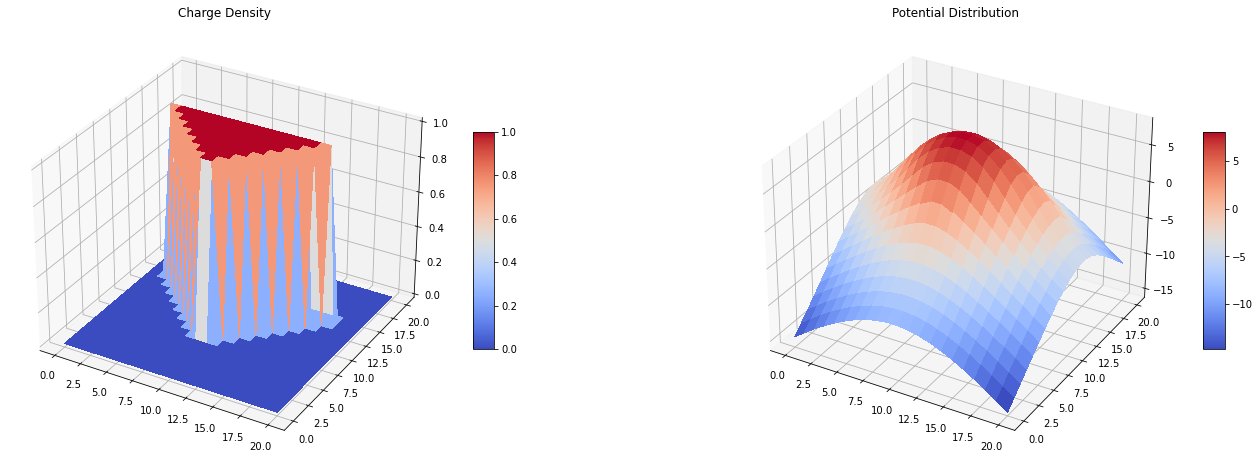

In [ ]:
from matplotlib import cm
fig_jr=plt.figure(figsize=(24,8))
ax1_jr = fig_jr.add_subplot(1, 2, 1, projection='3d')
X1 = np.arange(0,N)
Y1 = np.arange(0,N)
X1, Y1 = np.meshgrid(X1, Y1)
Z1_jr = charge_density[0:N,0:N]
surf1_jr = ax1_jr.plot_surface(X1, Y1, Z1_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax1_jr.set_title('Charge Density')
fig_jr.colorbar(surf1_jr, shrink=0.5, aspect=10)


ax3_jr = fig_jr.add_subplot(1, 2, 2, projection='3d')
Z3_jr = potential_jr[0:N,0:N]
surf3_jr = ax3_jr.plot_surface(X1, Y1, Z3_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax3_jr.set_title('Potential Distribution')
fig_jr.colorbar(surf3_jr, shrink=0.5, aspect=10)


## Part b)

Define some necessary function

In [ ]:
d=2
epsilon=1
h=1

In [ ]:
def jacobi_relaxation(bound_jr,potential_initial,charge_density,N):
    iterations=0
    potential_here=copy.deepcopy(potential_initial) 

    while True:
        iterations+=1
        potential_new=copy.deepcopy(potential_here) 

        # Only update the points inside.
        # Not considering updating the boundaries

        for i in range(1,N+1):
            for j in range(1,N+1):  
                left_index=i-h
                right_index=i+h
                up_index=j+h
                down_index=j-h
                potential_new[i,j]=(1/(2*d))*(potential_here[i,up_index]+potential_here[i,down_index]+potential_here[right_index,j]
                                              +potential_here[left_index,j])+(h**2/(2*d*epsilon))*charge_density[i,j] 
        max_delta=np.max(np.abs(potential_new-potential_here)) 
        
        if max_delta <= bound_jr:
            break
        else:
            potential_here=copy.deepcopy(potential_new)
            
    return iterations,potential_new

In [ ]:
def gauss_seidel_relaxation(bound_here,potential_initial,charge_density,N):
    iterations=0
    potential_new=copy.deepcopy(potential_initial)
    while True:
        iterations+=1
        max_delta=0
        for i in range(1,N+1):
            for j in range(1,N+1): 
                left_index=i-h
                right_index=i+h
                up_index=j+h
                down_index=j-h
                potential_point_new=(1/(2*d))*(potential_new[i,up_index]+potential_new[i,down_index]+potential_new[right_index,j]
                                              +potential_new[left_index,j])+(h**2/(2*d*epsilon))*charge_density[i,j] 
                max_delta=max(max_delta,np.abs(potential_new[i,j]-potential_point_new))  
                potential_new[i,j]=potential_point_new 
        if max_delta <= bound_here:
            break
    return iterations,potential_new

In [ ]:
def suc_overrelaxation_scheme(bound_here,potential_initial,charge_density,N):
    iterations=0
    potential_new=copy.deepcopy(potential_initial)
    rhere=np.cos(np.pi/(N))
    w_opt=2/(1+np.sqrt(1-rhere**2))

    while True:
        iterations+=1
        max_delta=0
        for i in range(1,N+1):
            for j in range(1,N+1): 
                left_index=i-h
                right_index=i+h
                up_index=j+h
                down_index=j-h
                potential_point_new=(1-w_opt)*potential_new[i,j]+w_opt*((1/(2*d))*(potential_new[i,up_index]
                                                                                   +potential_new[i,down_index]
                                                                                   +potential_new[right_index,j]
                                              +potential_new[left_index,j])+(h**2/(2*d*epsilon))*charge_density[i,j]) 
                max_delta=max(max_delta,np.abs(potential_new[i,j]-potential_point_new))  
                potential_new[i,j]=potential_point_new 
        if max_delta <= bound_here:
            break

    return iterations,potential_new

In [ ]:
# The hexagonal charge distribution 
# Break the hexagon into 3 parts, upper triangle, rectangle and lower triangle 
def return_hexagonal_charge_density(N):
    hex_charge_density=np.zeros((N+3,N+3)) 
    starting_row = 1 
    starting_position_left = int(N/2)

    #i. upper triangular part
    for i in range(starting_row,int(np.ceil(starting_row+N/4))):
        length = 2 + (i - starting_row)*4
        starting_position_left = int(N/2) - (i-starting_row)*2
        for j in range(starting_position_left,int(starting_position_left+length)):
            hex_charge_density[i,j] = 1 

    #ii. rectangular part 
    width_of_rectangle = int(N/2) 
    starting_row = int(starting_row+N/4)
    for i in range(starting_row,starting_row+width_of_rectangle):
        for j in range(starting_position_left,int(starting_position_left+length)):
            hex_charge_density[i,j] = 1


    #iii. lower triangular part
    starting_row = int(starting_row + width_of_rectangle)
    length = length + 4
    starting_position_left = starting_position_left - 2 

    for i in range(starting_row,int(np.ceil(starting_row+N/4))):
        length = length - 4
        starting_position_left = starting_position_left + 2
        for j in range(starting_position_left,int(starting_position_left+length)):
            hex_charge_density[i,j] = 1 
    
    #print(hex_charge_density[35:])
    return hex_charge_density

In [ ]:
# Below function combine all the codes of Q2 

def Q2(N):
    
    potential_initial=np.zeros((N+3,N+3)) 
    hexagonal_charge_density = return_hexagonal_charge_density(N)

    iterations_jr,potential_jr = jacobi_relaxation(0.001,potential_initial,hexagonal_charge_density,N)
    iterations_gsr,potential_gsr = gauss_seidel_relaxation(0.001,potential_initial,hexagonal_charge_density,N)
    iterations_sor,potential_sor = suc_overrelaxation_scheme(0.001,potential_initial,hexagonal_charge_density,N)

    from matplotlib import cm
    fig_jr=plt.figure(figsize=(15,10))
    ax1_jr = fig_jr.add_subplot(2, 2, 1, projection='3d')
    X1 = np.arange(0,N+3)
    Y1 = np.arange(0,N+3)
    X1, Y1 = np.meshgrid(X1, Y1)
    Z1_jr = hexagonal_charge_density[0:N+3,0:N+3]
    surf1_jr = ax1_jr.plot_surface(X1, Y1, Z1_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)

    ax1_jr.set_title(f'Charge Density when N = {N}')
    fig_jr.colorbar(surf1_jr, shrink=0.5, aspect=10)


    ax2_jr = fig_jr.add_subplot(2, 2, 2, projection='3d')
    Z2_jr = potential_jr[0:N+3,0:N+3]
    surf2_jr = ax2_jr.plot_surface(X1, Y1, Z2_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)
    ax2_jr.set_title('Potential Distribution (Jacobi Relaxation)')
    fig_jr.colorbar(surf2_jr, shrink=0.5, aspect=10)


    ax3_jr = fig_jr.add_subplot(2, 2, 3, projection='3d')
    Z3_jr = potential_gsr[0:N+3,0:N+3]
    surf3_jr = ax3_jr.plot_surface(X1, Y1, Z3_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)
    ax3_jr.set_title('Potential Distribution (Gauss-Sedial Relaxation)')
    fig_jr.colorbar(surf3_jr, shrink=0.5, aspect=10)


    ax4_jr = fig_jr.add_subplot(2, 2, 4, projection='3d')
    Z4_jr = potential_sor[0:N+3,0:N+3]
    surf4_jr = ax4_jr.plot_surface(X1, Y1, Z4_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)
    ax4_jr.set_title('Potential Distribution (Successive Overrelaxation Scheme)')
    fig_jr.colorbar(surf4_jr, shrink=0.5, aspect=10)


### N = 10 

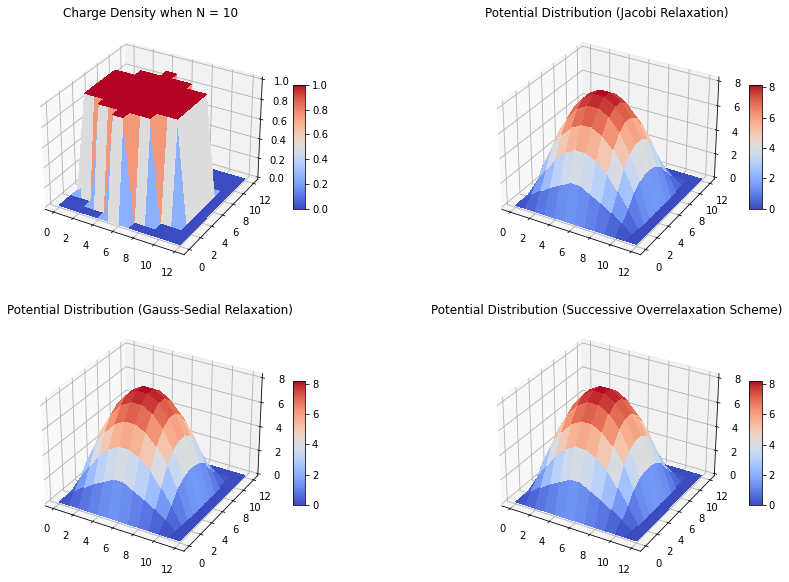

In [ ]:
Q2(10)

### N = 20 

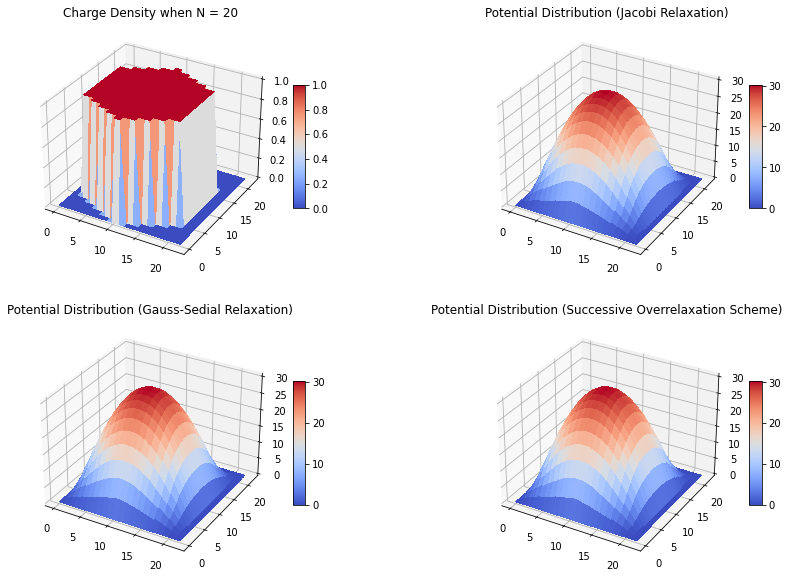

In [ ]:
Q2(20)

### N = 40 

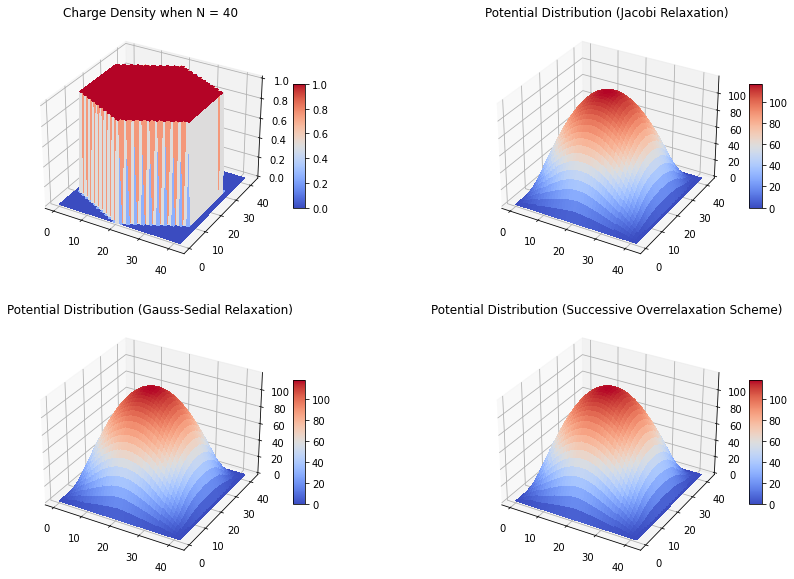

In [ ]:
Q2(40)

# Question 2 

(Please refer to the another pdf file that I have submitted)